In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
file_path = "/dataset/ibm.csv"
data = pd.read_csv(file_path)

print(data.head())

                        Date      Open      High       Low     Close  Volume  \
0  1962-01-02 00:00:00-05:00  1.518550  1.518550  1.501487  1.501487  407940   
1  1962-01-03 00:00:00-05:00  1.501487  1.514612  1.501487  1.514612  305955   
2  1962-01-04 00:00:00-05:00  1.514613  1.514613  1.498863  1.499519  274575   
3  1962-01-05 00:00:00-05:00  1.497551  1.497551  1.467363  1.469988  384405   
4  1962-01-08 00:00:00-05:00  1.468675  1.468675  1.430613  1.442425  572685   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
data = data[['Open', 'High', 'Low', 'Volume', 'Close']]

In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [5]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, :-1])  # Features
        y.append(data[i + time_step, -1])     # Target (Close price)
    return np.array(X), np.array(y)

In [6]:
time_step = 60
X, y = create_sequences(scaled_data, time_step=time_step)


In [7]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [8]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [10]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_step, features)


In [11]:
X_train.shape[1]

60

### LSTM Model

In [12]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=input_shape),
    LSTM(units=50),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Training the model
num_epochs = 30
batch_size = 64

history_lstm = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0017 - val_loss: 4.3361e-04
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.3034e-05 - val_loss: 3.1681e-04
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.2675e-05 - val_loss: 3.0284e-04
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.0115e-05 - val_loss: 4.3110e-04
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.2159e-05 - val_loss: 2.5424e-04
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.6055e-05 - val_loss: 2.7487e-04
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.9205e-05 - val_loss: 1.5971e-04
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.0030e-05 - val_loss: 1.8492e-04
Epoch 9/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.9687e-05 - val_loss: 5.8844e-04
Epoch 10/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.2810e-05 - val_loss: 1.4701e-04
Epoch 11/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss:

In [16]:
# Evaluate on test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3540e-05
Test Loss: 5.9791542298626155e-05


### Calculating the metrices

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae


In [19]:
# Making predictions on the test set
# lstm_predictions = model.predict(X_test)


predictions = model.predict(X_test)


# Adding dummy columns to match the original scaled data shape (5 columns)
# 4 dummy columns to match Open, High, Low, Volume
dummy_columns = np.zeros((predictions.shape[0], 4))
predicted_prices_scaled = np.concatenate((dummy_columns, predictions), axis=1)

# Applying inverse transformation to get back to original scale
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, -1]  # Get only the Close column

# for actual prices
actual_prices_scaled = np.concatenate((dummy_columns, y_test.numpy().reshape(-1, 1)), axis=1)
actual_prices = scaler.inverse_transform(actual_prices_scaled)[:, -1]

# Calculating metrics
lstm_mse, lstm_rmse, lstm_mae = calculate_metrics(actual_prices, predicted_prices)
print(f'LSTM Model - MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}')


99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM Model - MSE: 3.2354, RMSE: 1.7987, MAE: 1.2430


### RNN model

In [20]:
rnn_model = Sequential([
    tf.keras.layers.SimpleRNN(units=50, return_sequences=True, input_shape=input_shape),
    tf.keras.layers.SimpleRNN(units=50),
    Dense(units=1)
])

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

history_rnn = rnn_model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


198/198 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.0156 - val_loss: 0.0019
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 9.7983e-05 - val_loss: 0.0014
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 4.8778e-05 - val_loss: 0.0012
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3.5114e-05 - val_loss: 8.9299e-04
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 3.0618e-05 - val_loss: 9.1549e-04
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3.8522e-05 - val_loss: 7.5010e-04
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3.1163e-05 - val_loss: 5.4705e-04
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 3.0342e-05 - val_loss: 4.9707e-04
Epoch 9/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 3.6265e-05 - val_loss: 4.6301e-04
Epoch 10/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.2701e-05 - val_loss: 4.4108e-04
Epoch 11/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 2.9876e-05 - v

In [21]:

# Make predictions and evaluate RNN model
rnn_predictions = rnn_model.predict(X_test)


# Add dummy columns to match the original scaled data shape (5 columns)
dummy_columns = np.zeros((rnn_predictions.shape[0], 4))  # 4 dummy columns to match Open, High, Low, Volume
predicted_prices_scaled = np.concatenate((dummy_columns, rnn_predictions), axis=1)

# Apply inverse transformation to get back to original scale
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, -1]  # Get only the Close column

# Similarly for actual prices
actual_prices_scaled = np.concatenate((dummy_columns, y_test.numpy().reshape(-1, 1)), axis=1)
actual_prices = scaler.inverse_transform(actual_prices_scaled)[:, -1]


rnn_mse, rnn_rmse, rnn_mae = calculate_metrics(actual_prices, predicted_prices)
print(f'RNN Model - MSE: {rnn_mse:.4f}, RMSE: {rnn_rmse:.4f}, MAE: {rnn_mae:.4f}')

99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
RNN Model - MSE: 12.2914, RMSE: 3.5059, MAE: 2.1051


### GRU model

In [22]:
# GRU model
gru_model = Sequential([
    tf.keras.layers.GRU(units=50, return_sequences=True, input_shape=input_shape),
    tf.keras.layers.GRU(units=50),
    Dense(units=1)
])

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
history_gru = gru_model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0013 - val_loss: 1.3979e-04
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.4495e-05 - val_loss: 1.1949e-04
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4420e-05 - val_loss: 1.0056e-04
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3261e-05 - val_loss: 1.0206e-04
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.2299e-05 - val_loss: 8.2663e-05
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.2403e-05 - val_loss: 1.8051e-04
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3818e-05 - val_loss: 9.9993e-05
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.8865e-06 - val_loss: 1.7123e-04
Epoch 9/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.1144e-05 - val_loss: 8.7675e-05
Epoch 10/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0251e-05 - val_loss: 8.4320e-05
Epoch 11/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0565e-0

In [23]:
# Make predictions and evaluate GRU model
gru_predictions = gru_model.predict(X_test)

# Add dummy columns to match the original scaled data shape (5 columns)
dummy_columns = np.zeros((gru_predictions.shape[0], 4))  # 4 dummy columns to match Open, High, Low, Volume
predicted_prices_scaled = np.concatenate((dummy_columns, gru_predictions), axis=1)

# Apply inverse transformation to get back to original scale
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, -1]  # Get only the Close column

# Similarly for actual prices
actual_prices_scaled = np.concatenate((dummy_columns, y_test.numpy().reshape(-1, 1)), axis=1)
actual_prices = scaler.inverse_transform(actual_prices_scaled)[:, -1]

gru_mse, gru_rmse, gru_mae = calculate_metrics(actual_prices, predicted_prices)
print(f'GRU Model - MSE: {gru_mse:.4f}, RMSE: {gru_rmse:.4f}, MAE: {gru_mae:.4f}')

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
GRU Model - MSE: 5.2532, RMSE: 2.2920, MAE: 1.8028


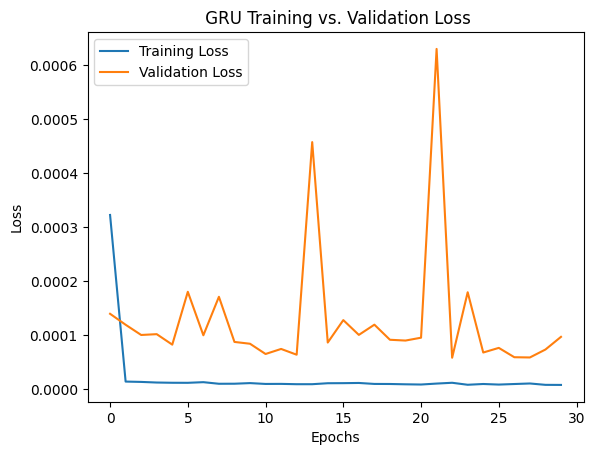

In [27]:
import matplotlib.pyplot as plt

plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title(' GRU Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting training and validation accuracy and loss plot for each models

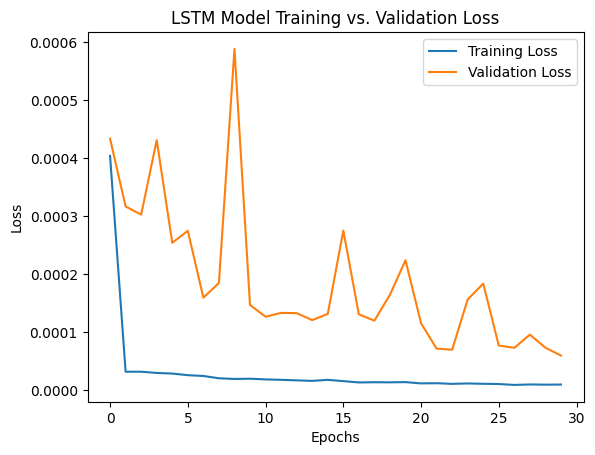

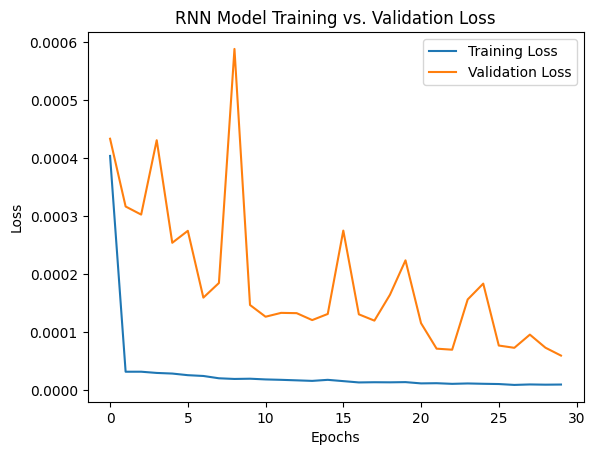

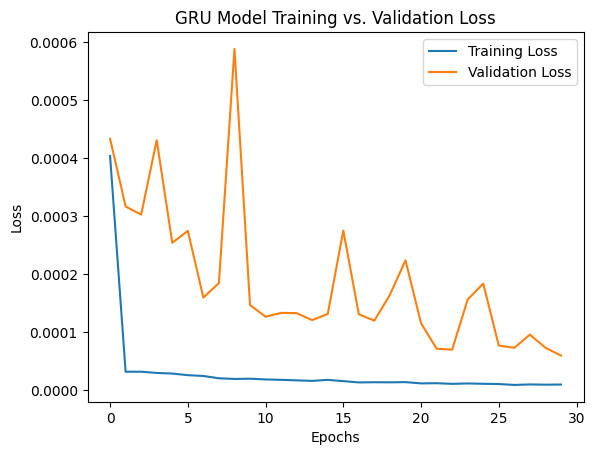

In [29]:
import matplotlib.pyplot as plt
# Plotting function for loss
def plot_loss(history, model_name):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Training vs. Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot loss for each model
plot_loss(history_lstm, 'LSTM Model')
plot_loss(history_lstm, 'RNN Model')
plot_loss(history_lstm, 'GRU Model')